https://www.kaggle.com/datasets/shivammehta007/trump-tweetcsv

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #binary ise Bernolli veya Gauss kullanılır
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob , Word
from nltk.stem.snowball import SnowballStemmer

from langdetect import detect
%matplotlib inline

from nltk import word_tokenize

from wordcloud import WordCloud
from wordcloud import WordCloud , STOPWORDS

In [3]:
df = pd.read_csv("task3_corpus.csv")

In [4]:
df.head()

,text
0,Russia has informed us that they have removed ...
1,Hearing word that Russia Syria and to a lesser...
2,Sean Davis The Federalist: “Mueller proved his...
3,Russia Russia Russia! That’s all you heard at ...
4,Russia Russia Russia! That’s all you heard at ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    341 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [6]:
df["text"] = df["text"].str.lower()
df["text"] = df["text"].str.replace("[^\w\s]" , "")
df["text"] = df["text"].str.replace("\d+" , "") 
df["text"] = df["text"].str.replace("\n"," ").replace("\r" , "")
df["text"] = df["text"].str.replace("[^a-zA-Z0-9\s]" , '')
df["text"] = df["text"].str.lower()


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [7]:
def clean_text(text):
    import re
    import string

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

clean = lambda x: clean_text(x)
df["text"] = df["text"].apply(clean) 

In [8]:
import nltk 
from nltk import word_tokenize
nltk.download("punkt")

from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
import nltk
from nltk.corpus import stopwords,words
nltk.download('stopwords')
stop_words = stopwords.words("english")
stop_words = [word.replace("\'", "") for word in stop_words] # stop wordleri kaldırdım
df["text"] = df["text"].apply(lambda row: " ".join([token for token in row.split(" ") if token not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import nltk
from nltk.stem import WordNetLemmatizer

df["text"]= df["text"].apply(lambda x : WordNetLemmatizer().lemmatize(x))

In [11]:
df[["polarity" , "subjectivity"]] = df["text"].apply(lambda x : pd.Series(TextBlob(x).sentiment))

In [12]:
df.head()

,text,polarity,subjectivity
0,russia informed us removed people venezuela,0.000000,0.000000
1,hearing word russia syria lesser extent iran b...,0.333333,0.566667
2,sean davis federalist mueller proved entire op...,0.045455,0.393182
3,russia russia russia thats heard beginning wit...,-0.500000,1.000000
4,russia russia russia thats heard beginning wit...,-0.500000,1.000000


In [13]:
df.loc[df["polarity"]>0.2 , "SentimentPolarity"] = "positive"
df.loc[df["polarity"]<-0.2 , "SentimentPolarity"] = "negative"
df["SentimentPolarity"].fillna("neutral" , inplace=True)


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SentimentPolarity', ylabel='count'>

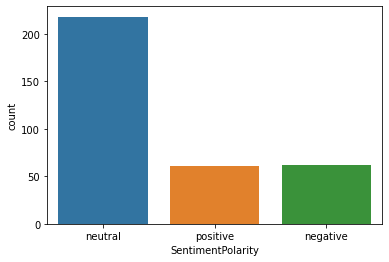

In [14]:
import seaborn as sns
sns.countplot(df["SentimentPolarity"])

Trump'ın attığı tweetlering geneli nötrdür

In [15]:
from PIL import Image

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   mask =mask,
                   max_words=25000,
                   stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Succesfully")
    path = "wc.png"
    display(Image.open(path))

Word Cloud Saved Succesfully


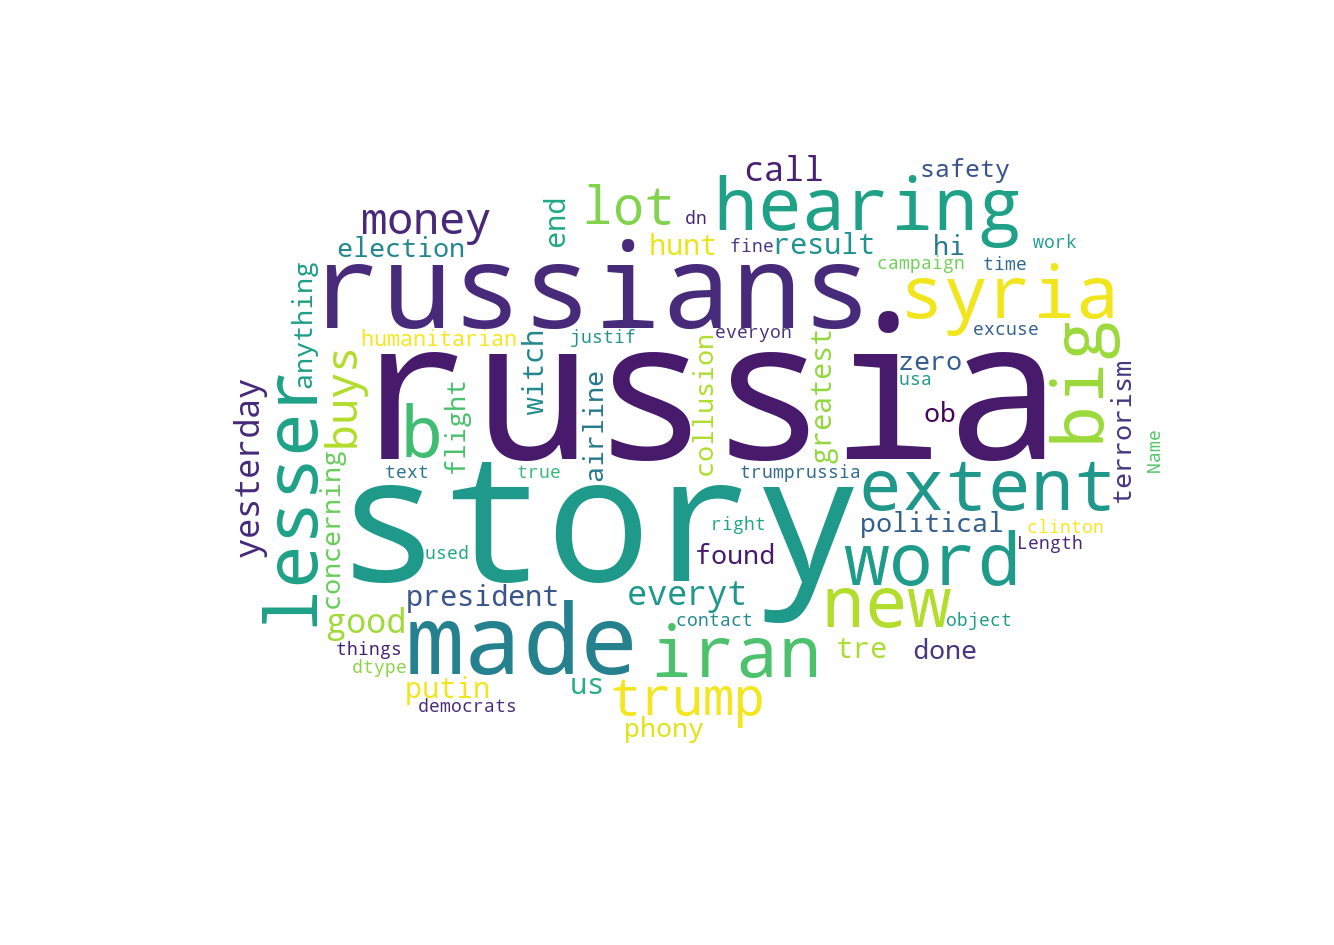

In [22]:
text1 = df[df["SentimentPolarity"]=="positive"]
create_wordcloud(text1.text)

Word Cloud Saved Succesfully


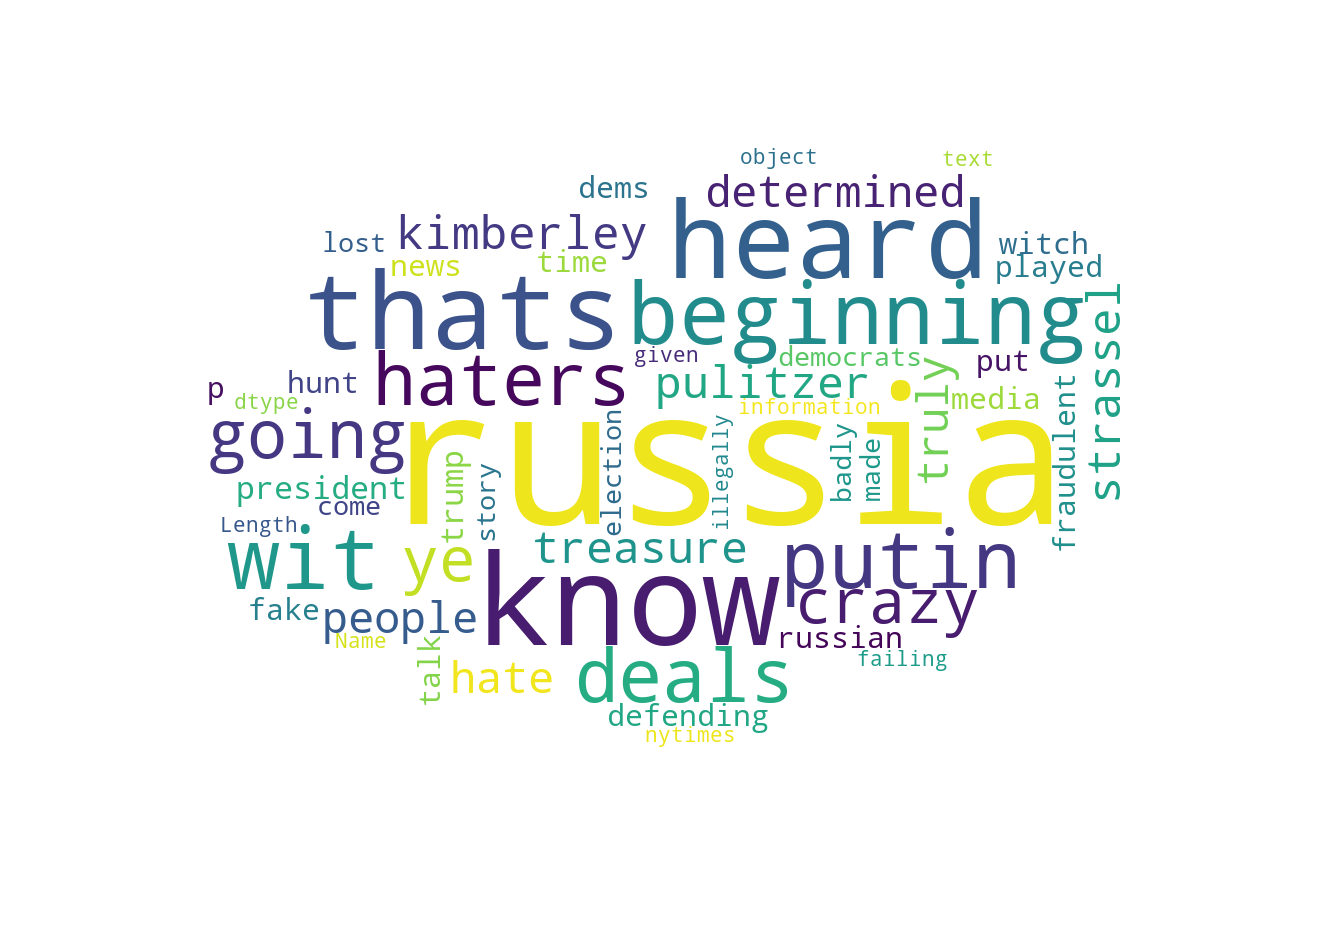

In [23]:
text1 = df[df["SentimentPolarity"]=="negative"]
create_wordcloud(text1.text)

Word Cloud Saved Succesfully


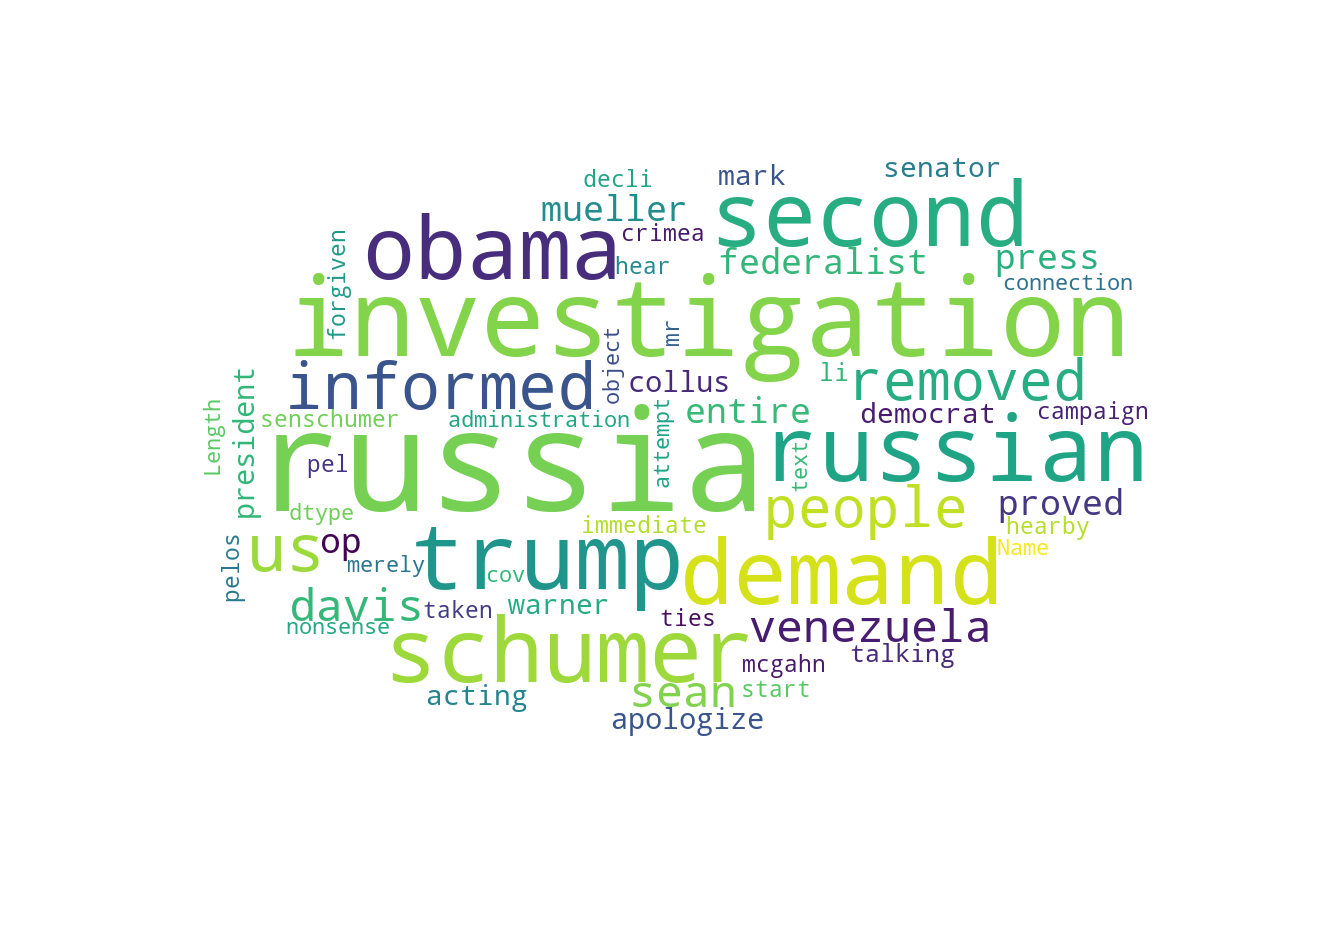

In [24]:
text1 = df[df["SentimentPolarity"]=="neutral"]
create_wordcloud(text1.text)

 ## Trump genel olarak rusya hakkında konuşmuş :D